<a href="https://colab.research.google.com/github/evildead23151/Deep-Learning/blob/main/Spam_Ham_using_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim

In [2]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

In [3]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
vec_king = wv['king']

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
vec_king.shape

(300,)

In [5]:
from google.colab import files
uploaded = files.upload()


Saving SMSSpamCollection.txt to SMSSpamCollection.txt


In [6]:
import pandas as pd
messages = pd.read_csv('SMSSpamCollection.txt', sep = '\t', names= ["label", "message"])

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import re
lemmatizer = WordNetLemmatizer()


In [8]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
corpus = []
for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
  review = review.lower()
  review = review.split()
  review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

In [10]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [11]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [12]:
words = []
for sent in corpus:
  sent_token=sent_tokenize(sent)
  for sent in sent_token:
    words.append(simple_preprocess(sent))

In [13]:
words

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply'],
 ['dun', 'say', 'early', 'hor', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  'receivea',
 

In [14]:
import gensim

In [17]:
model=gensim.models.Word2Vec(words)

In [18]:
model.wv.index_to_key

['call',
 'get',
 'ur',
 'gt',
 'lt',
 'go',
 'day',
 'ok',
 'free',
 'know',
 'come',
 'like',
 'time',
 'good',
 'got',
 'text',
 'love',
 'want',
 'send',
 'one',
 'need',
 'txt',
 'today',
 'going',
 'stop',
 'home',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'dont',
 'think',
 'tell',
 'week',
 'phone',
 'hi',
 'new',
 'later',
 'please',
 'pls',
 'co',
 'msg',
 'min',
 'night',
 'dear',
 'make',
 'message',
 'well',
 'say',
 'thing',
 'much',
 'claim',
 'great',
 'oh',
 'hope',
 'hey',
 'give',
 'number',
 'happy',
 'wat',
 'work',
 'friend',
 'way',
 'yes',
 'www',
 'let',
 'prize',
 'right',
 'tomorrow',
 'already',
 'tone',
 'said',
 'win',
 'ask',
 'life',
 'cash',
 'amp',
 'yeah',
 'im',
 'really',
 'babe',
 'meet',
 'find',
 'miss',
 'morning',
 'last',
 'service',
 'year',
 'thanks',
 'uk',
 'would',
 'anything',
 'com',
 'care',
 'also',
 'nokia',
 'lol',
 'every',
 'feel',
 'keep',
 'pick',
 'sure',
 'urgent',
 'sent',
 'contact',


In [19]:
model.corpus_count

5564

In [20]:
model.epochs

5

In [21]:
model.wv.similar_by_word('kid')

[('try', 0.9984537959098816),
 ('sure', 0.998443603515625),
 ('find', 0.9984380602836609),
 ('today', 0.9984160661697388),
 ('one', 0.9984133243560791),
 ('even', 0.9984044432640076),
 ('people', 0.998382568359375),
 ('like', 0.9983797669410706),
 ('bt', 0.9983670711517334),
 ('get', 0.9983617663383484)]

In [22]:
model.wv['good'].shape

(100,)

In [23]:
words[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [25]:
def avg_word2vec(doc):
    vectors = [model.wv[word] for word in doc if word in model.wv.key_to_index]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

In [26]:
!pip install tqdm

In [30]:
from tqdm import tqdm
import numpy as np

In [31]:
X = []
for i in tqdm(range(len(words))):
  print("Hello", i)
  X.append(avg_word2vec(words[i]))

100%|██████████| 5564/5564 [00:00<00:00, 28369.66it/s]

Hello 0
Hello 1
Hello 2
Hello 3
Hello 4
Hello 5
Hello 6
Hello 7
Hello 8
Hello 9
Hello 10
Hello 11
Hello 12
Hello 13
Hello 14
Hello 15
Hello 16
Hello 17
Hello 18
Hello 19
Hello 20
Hello 21
Hello 22
Hello 23
Hello 24
Hello 25
Hello 26
Hello 27
Hello 28
Hello 29
Hello 30
Hello 31
Hello 32
Hello 33
Hello 34
Hello 35
Hello 36
Hello 37
Hello 38
Hello 39
Hello 40
Hello 41
Hello 42
Hello 43
Hello 44
Hello 45
Hello 46
Hello 47
Hello 48
Hello 49
Hello 50
Hello 51
Hello 52
Hello 53
Hello 54
Hello 55
Hello 56
Hello 57
Hello 58
Hello 59
Hello 60
Hello 61
Hello 62
Hello 63
Hello 64
Hello 65
Hello 66
Hello 67
Hello 68
Hello 69
Hello 70
Hello 71
Hello 72
Hello 73
Hello 74
Hello 75
Hello 76
Hello 77
Hello 78
Hello 79
Hello 80
Hello 81
Hello 82
Hello 83
Hello 84
Hello 85
Hello 86
Hello 87
Hello 88
Hello 89
Hello 90
Hello 91
Hello 92
Hello 93
Hello 94
Hello 95
Hello 96
Hello 97
Hello 98
Hello 99
Hello 100
Hello 101
Hello 102
Hello 103
Hello 104
Hello 105
Hello 106
Hello 107
Hello 108
Hello 109
Hello 110


In [32]:
X

[array([-0.15703647,  0.26674846,  0.07489646,  0.0752176 ,  0.06443272,
        -0.41869003,  0.0288967 ,  0.5819753 , -0.21767117, -0.08053941,
        -0.15580612, -0.32656524, -0.03941138,  0.12603875,  0.08505312,
        -0.18390273,  0.02625741, -0.3068376 ,  0.06900928, -0.43424752,
         0.13329388,  0.16871537,  0.07174402, -0.10244098, -0.17188229,
        -0.02125667, -0.22032958, -0.19752455, -0.1812306 ,  0.04186308,
         0.28421262,  0.03205701,  0.10767665, -0.12384179, -0.10757069,
         0.32192403, -0.07661054, -0.27761528, -0.17529887, -0.44429284,
        -0.01592287, -0.20168525, -0.04806936,  0.04063546,  0.2225172 ,
        -0.1322183 , -0.10512622, -0.04875633,  0.06469885,  0.18387017,
         0.13421081, -0.20674585, -0.03481278,  0.02904823, -0.11835778,
         0.12150912,  0.17832433, -0.03329232, -0.21969837,  0.04577053,
         0.03842773,  0.10984823, -0.048487  , -0.06486995, -0.36406183,
         0.15549754,  0.16204643,  0.15780163, -0.3

In [33]:
len(X)

5564

In [34]:
X_new = np.array(X)

In [36]:
X_new[0].shape

(100,)

In [37]:
X_new.shape

(5564, 100)

In [38]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


from matplotlib import pyplot as plt
import seaborn as sns
messages.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

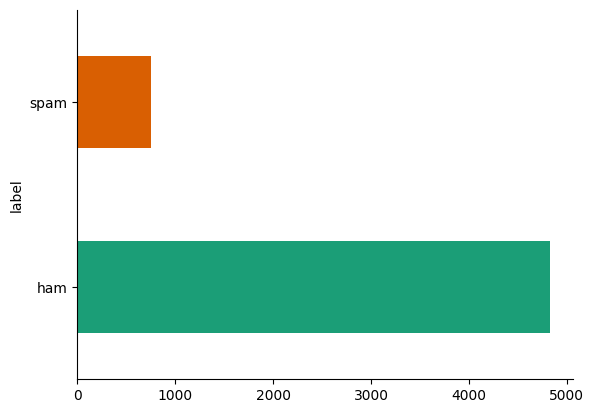

In [39]:
from matplotlib import pyplot as plt
import seaborn as sns
messages.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [43]:
for i, j, k in zip(list(map(len, corpus)), corpus, messages['message']):
    print("Length:", i, "| Cleaned:", j, "| Original:", k)


Length: 82 | Cleaned: go jurong point crazy available bugis n great world la e buffet cine got amore wat | Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Length: 23 | Cleaned: ok lar joking wif u oni | Original: Ok lar... Joking wif u oni...
Length: 101 | Cleaned: free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply | Original: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Length: 35 | Cleaned: u dun say early hor u c already say | Original: U dun say so early hor... U c already then say...
Length: 35 | Cleaned: nah think go usf life around though | Original: Nah I don't think he goes to usf, he lives around here though
Length: 77 | Cleaned: freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv | Original: FreeMsg Hey there darling 

In [44]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [45]:
y = messages[list(map(lambda x: len(x)>0, corpus))]
y = pd.get_dummies(y['label'])
y = y.iloc[:, 0].values

In [46]:
y.shape

(5564,)

In [50]:
df = pd.DataFrame()
for i in range(len(X)):
    row_df = pd.DataFrame(X[i].reshape(1, -1))
    df = pd.concat([df, row_df], ignore_index=True)


In [51]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.157036,0.266748,0.074896,0.075218,0.064433,-0.418690,0.028897,0.581975,-0.217671,-0.080539,...,0.284179,0.144588,-0.013703,0.139823,0.435969,0.304248,0.095083,-0.297179,0.104151,0.014418
1,-0.127267,0.222098,0.067770,0.068089,0.049987,-0.358882,0.024400,0.494593,-0.190144,-0.065168,...,0.238713,0.120188,-0.019124,0.117100,0.372032,0.254079,0.081803,-0.255167,0.083806,0.014653
2,-0.165385,0.285720,0.078494,0.091655,0.067319,-0.434082,0.031839,0.614364,-0.227967,-0.081637,...,0.292952,0.151153,-0.011034,0.139807,0.457351,0.323558,0.092834,-0.314736,0.102947,0.017519
3,-0.218793,0.368040,0.106086,0.111603,0.093658,-0.586714,0.039432,0.816625,-0.300965,-0.105933,...,0.396197,0.201820,-0.016760,0.199981,0.606658,0.424255,0.128786,-0.417940,0.140960,0.016954
4,-0.176056,0.296992,0.081228,0.083640,0.068550,-0.462027,0.034646,0.651589,-0.241462,-0.085463,...,0.316534,0.165553,-0.015648,0.156721,0.492235,0.342218,0.108431,-0.334351,0.119442,0.015425


In [52]:
X = df

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [54]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
5284,-0.173777,0.308451,0.088781,0.095208,0.073949,-0.482732,0.034682,0.678423,-0.251020,-0.095140,...,0.319431,0.173055,-0.010488,0.162146,0.513539,0.359358,0.098114,-0.348859,0.116545,0.018336
3090,-0.037977,0.052524,0.015271,0.010804,0.008457,-0.076245,0.003128,0.115775,-0.037130,-0.020753,...,0.063105,0.032190,-0.006928,0.036527,0.096015,0.068846,0.015032,-0.061318,0.025871,0.006958
1012,-0.161470,0.274490,0.074599,0.083944,0.070548,-0.428340,0.032759,0.595011,-0.222800,-0.082326,...,0.288487,0.147188,-0.010860,0.141689,0.444848,0.312078,0.103410,-0.307304,0.100142,0.017667
2986,-0.235103,0.392966,0.106083,0.121781,0.091356,-0.604571,0.037751,0.848922,-0.319366,-0.112085,...,0.403239,0.207020,-0.009143,0.195928,0.634860,0.446568,0.133735,-0.435765,0.142800,0.021963
4126,-0.202333,0.343716,0.099889,0.100933,0.081525,-0.541418,0.037525,0.760199,-0.285073,-0.098418,...,0.370155,0.195686,-0.013049,0.189005,0.565212,0.399478,0.116861,-0.393184,0.135457,0.023714


In [55]:
y_train

array([False,  True,  True, ...,  True,  True,  True])

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [57]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))

0.9739442946990117


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.85      0.90       151
        True       0.98      0.99      0.99       962

    accuracy                           0.97      1113
   macro avg       0.97      0.92      0.94      1113
weighted avg       0.97      0.97      0.97      1113

